<a href="https://colab.research.google.com/github/rakha05/R/blob/main/sentiment_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('/content/master_emoji.csv')
df.head()

,ID,Emoji,Sentiment,Makna Emoji,Special Tag
0,1,😛,negative,Face With Stuck-Out Tongue,<FACE WITH STUCK-OUT TOUNGES>
1,2,😠,negative,Angry Face,<Angry Face>
2,3,💣,negative,Bomb,<Bomb>
3,4,💔,negative,Broken Heart,<Broken Heart>
4,5,😕,negative,Confused Face,<Confused Face>


In [34]:
#pilih attribut mana saja yang akan di ambil
df = df[['Special Tag']]
df

,Special Tag
0,<FACE WITH STUCK-OUT TOUNGES>
1,<Angry Face>
2,<Bomb>
3,<Broken Heart>
4,<Confused Face>
...,...
160,<Light Bulb>
161,<Chart Increasing>
162,<Hundred Points>
163,<OK Button>


In [35]:
#pilih attribut mana saja yang akan di ambil
df = df[['Special Tag']]
df

,Special Tag
0,<FACE WITH STUCK-OUT TOUNGES>
1,<Angry Face>
2,<Bomb>
3,<Broken Heart>
4,<Confused Face>
...,...
160,<Light Bulb>
161,<Chart Increasing>
162,<Hundred Points>
163,<OK Button>


In [36]:
df = df.drop_duplicates(subset=['Special Tag'],keep=False)

In [37]:
df.duplicated().sum()

0

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

,0
Text Tweet,0


In [39]:
def clean_twitter_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # hapus mention
    text = re.sub(r'#\w+', '', text)  # hapus hashtag
    text = re.sub(r'RT[\s]+', '', text)  # hapus Retweet
    text = re.sub(r'https?://\S+', '', text)  # hapus url

    text = re.sub(r'\b\d+\.\d+\b', '', text)  # hapus angka desimal (float)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # hapus karakter non alpha numeric
    # text = re.sub(r'\s+', ' ', text).


    return text

df['Special Tag'] = df['Special Tag'].apply(clean_twitter_text)

In [40]:
df['Special Tag'] = df['Special Tag'].str.lower()
df

,Special Tag
0,face with stuckout tounges
1,angry face
2,bomb
3,broken heart
4,confused face
...,...
160,light bulb
161,chart increasing
162,hundred points
163,ok button


In [41]:
#normalisasi

norm = {
    'utk' : 'untuk',
    'tdk' : 'tidak',
    'sdh' : 'sudah',
    'minn' : 'admin',
    'bkl' : 'akan',
    'gk' : 'tidak',
    'trbuat' : 'terbuat',
    'dr' : 'dari',
    'yg' : 'yang',
    'pdhl' : 'padahal',
    'otw' : 'on the way',
    'skg' : 'sekarang',
    'knp' : 'kenapa',
    'boss2': 'bos',
    'jdi' : 'jadi',
    'ln' : 'luar negri',
    'nnti' : 'nanti',
    'tmbah' : 'tambah',
    'wts' : 'want to sell',
    'drpda' : 'dari pada',
    'dll' : 'dan lain lain',
    'udh' : 'sudah',
    'lg' : 'lagi',
    'kira2' : 'kira kira',
    'klo' : 'kalau',
    'gw' : 'saya',
    'ga' : 'tidak',
    'byk' : 'banyak',
    'bnyk' : 'banyak',
    'sgra' : 'segera',
    'sgr' : 'segera'
}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i,norm[i])
  return str_text
df['Special Tag'] = df['Special Tag'].apply(lambda x: normalisasi(x))
df

,Special Tag
0,face with stuckout tounges
1,angry face
2,bomb
3,broken heart
4,confused face
...,...
160,light bulb
161,chart increasing
162,hundaried points
163,ok button


In [42]:
!pip install Sastrawi

In [43]:
#stopword

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["dan", "atau", "yang", "di", "ke", "kok"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['Special Tag'] = df['Special Tag'].apply(lambda x: stopword(x))
df.head()


,Special Tag
0,face with stuckout tounges
1,angry face
2,bomb
3,broken heart
4,confused face


In [44]:
#tokenize

tokenized = df['Special Tag'].apply(lambda x:x.split())
tokenized

,Special Tag
0,"[face, with, stuckout, tounges]"
1,"[angry, face]"
2,[bomb]
3,"[broken, heart]"
4,"[confused, face]"
...,...
160,"[light, bulb]"
161,"[chart, increasing]"
162,"[hundaried, points]"
163,[button]


In [45]:
#stemming ( mengubah kata imbuhan menjadi kata dasar, contoh : dimana menjadi mana)

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv("/content/hasil.csv", index=False)

face with stuckout tounges
angry face
bomb
broken heart
confused face
disappointed face
expressionless face
face savouring delicious food
face screaming in fear
face with cold sweat
face with open mouth
face with steam from nose
face with stuckout tongue closed eyes
face without mouth
fire
frowning face
grimacing face
high voltage
lying face
persevering face
person bowing
person running
pig nose
pouting face
seenoevil monkey
slightly frowning face
speaknoevil
thinking face
thumbs down
tongue
weary face
zippermouth face
neutral face
face with rolling eyes
smirking face
disappointed but relieved face
hushed face
sleepy face
tired face
sleeping face
relieved face
face with stuckout tongue winking eyenetidaktif
dariooling face
unamused face
pensive face
upsidedown face
moneymouth face
astonished face
confounded face
worried face
crying face
loudly crying face
frowning face with open mouth
anguished face
fearful face
face with open mouth cold sweat
flushed face
dizzy face
face with medical 

In [51]:
# !pip install translate

In [52]:
data = pd.read_csv("/content/hasil.csv", encoding = 'latin1')
data.head()

,Special Tag
0,face with stuckout tounges
1,angry face
2,bomb
3,broken heart
4,confused face


In [53]:
# from translate import Translator

# def convert_eng(tweet):
#   # Convert tweet to string to ensure 'expandtabs' works
#   tweet = str(tweet)
#   translator = Translator(to_lang='en', from_lang='id')
#   translation = translator.translate(tweet)
#   return translation

# data['tweet_english'] = data['full_text'].apply(convert_eng)
# data.to_csv("/content/preprocessing/hasil-bahasainggris-persib.csv")

In [20]:
# data = pd.read_csv('/content/preprocessing/hasil-bahasainggris-persib.csv',index_col=0)
# data.head()

In [54]:
!pip install googletrans==4.0.0-rc1

In [56]:
from googletrans import Translator

def convert_eng(tweet):
    # Convert tweet to string untuk menghindari error saat ada data float
    tweet = str(tweet)
    translator = Translator()
    # Menerjemahkan teks dari Bahasa Indonesia ke Bahasa Inggris
    translation = translator.translate(tweet, src='id', dest='en')
    return translation.text

# Menerapkan fungsi pada kolom 'full_text'
data['tweet_english'] = data['Special Tag'].apply(convert_eng)

# Menyimpan hasil ke file CSV
data.to_csv("/content/Hasil.csv", index=False)


In [57]:
data = pd.read_csv('/content/Hasil.csv',index_col=0)
data.head()

,tweet_english
Special Tag,
face with stuckout tounges,face with stuck out tongues
angry face,Angry face
bomb,Bomb
broken heart,broken heart
confused face,Confused face


In [58]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [59]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [60]:
#proses labeling

# Menggunakan Text Blob
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
  analysis = TextBlob(tweet)
  polaritas += analysis.polarity

  if analysis.sentiment.polarity > 0.0:
      total_positif += 1
      status.append('positif')
  elif analysis.sentiment.polarity == 0.0:
      total_netral += 1
      status.append('netral')
  else:
      total_negatif +=1
      status.append('Negatif')

  total += 1

print(f'hasil analisis data:\nPositif = {total_positif}\nNetral ={total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data: {total}')

hasil analisis data:
Positif = 15
Netral =125
Negatif = 25

Total Data: 165


In [61]:
#tampilkan data
data['klasifikasi'] = status
data

,tweet_english,klasifikasi
Special Tag,,
face with stuckout tounges,face with stuck out tongues,netral
angry face,Angry face,Negatif
bomb,Bomb,netral
broken heart,broken heart,Negatif
confused face,Confused face,Negatif
...,...,...
light bulb,Light Bulb,positif
chart increasing,Increasing chart,netral
hundaried points,Hundaried Points,netral


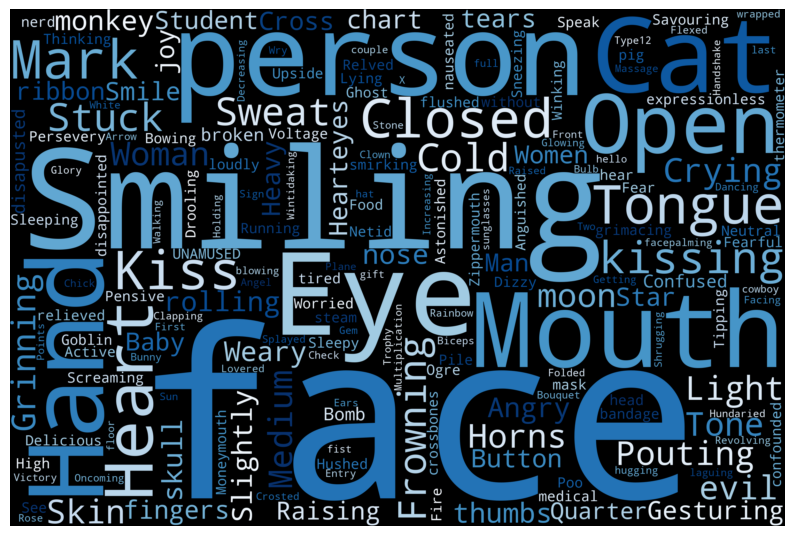

In [62]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
  plt.figure(figsize=(10,8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

# Assuming 'tweet_english' or '0' is the correct column name
# Replace 'tweet_english' with the actual name if different or use data.columns[0] if it is first column.
all_words = ' '.join([tweets for tweets in data['tweet_english']])
#all_words = ' '.join([tweets for tweets in data[data.columns[0]]])

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    random_state = 3,
    background_color='black',
    colormap="Blues_r",
    collocations = False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

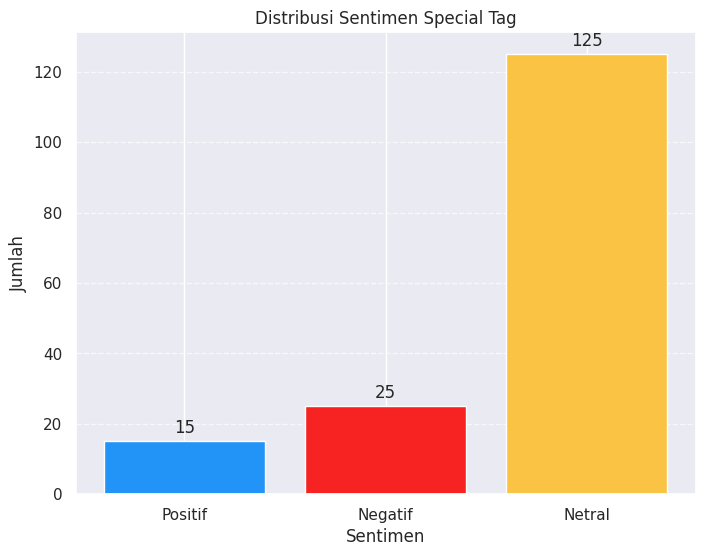

In [63]:
#visualisasi Sentimen

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels,counts, title):
  fig, ax = plt.subplots(figsize=(8,6))
  bars = ax.bar(labels,counts,color=['#2394f7','#f72323','#fac343'])

  for bar, count in zip(bars, counts):
      height = bar.get_height()
      ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width()/2, height),
                  xytext=(0,3),
                  textcoords='offset points',
                  ha='center',va='bottom')
  ax.grid(axis='y', linestyle='--',alpha=0.7)

  ax.set_xlabel('Sentimen')
  ax.set_ylabel('Jumlah')
  ax.set_title(title)

  plt.show()

show_bar_chart(labels,counts,'Distribusi Sentimen Special Tag')